In [40]:
import torch
import pandas as pd
import pathlib
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
from Bio.PDB import *

In [ ]:
cwd = pathlib.Path(".").glob("*.pdb")
# Create A chain maps as matrices
parser = PDBParser()
io = PDBIO()
for files in cwd:
    structure = parser.get_structure('X', files)
    arr_coord = []

    for residue in structure[0]["A"]:
        for atom in residue:
            x = atom.get_coord()
            arr_coord.append({'X': x[0],'Y':x[1],'Z':x[2]})

    coord_table = pd.DataFrame(arr_coord)
    dist = pdist(coord_table, metric = 'euclidean')
    distance_matrix = squareform(dist)
    

In [38]:
print(distance_matrix)
len(distance_matrix)

[[ 0.          1.49271057  2.50429361 ... 54.97269754 41.84728187
  41.24789253]
 [ 1.49271057  0.          1.53340726 ... 53.57006996 40.67160848
  40.10452911]
 [ 2.50429361  1.53340726  0.         ... 52.59855597 39.7778556
  39.13251943]
 ...
 [54.97269754 53.57006996 52.59855597 ...  0.         23.5949765
  24.01771012]
 [41.84728187 40.67160848 39.7778556  ... 23.5949765   0.
   2.78092083]
 [41.24789253 40.10452911 39.13251943 ... 24.01771012  2.78092083
   0.        ]]


799

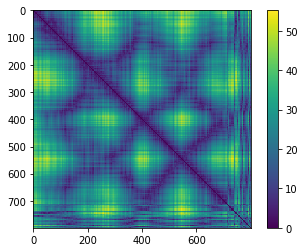

In [41]:
plt.imshow(distance_matrix, cmap='viridis')
plt.colorbar()
plt.show()